In [40]:
import numpy as np
import os
import PIL
from PIL import Image
import matplotlib.pyplot as plt
f_list = os.listdir('./data/numpy')

In [41]:
n = len(f_list)-1

In [42]:
im = np.load('./data/numpy/'+f_list[0])

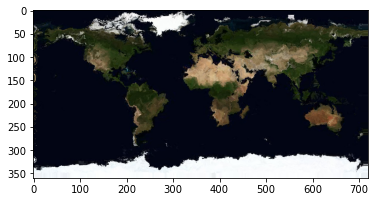

In [43]:
plt.imshow(im)

In [75]:
data = np.zeros((n+1,3,360,720))
for i in range(n+1):
    im = np.load('./data/numpy/'+f_list[i])
    for j in range(3):
        data[i,j,:,:] = im[:,:,j]


In [57]:
import torch
from torch.utils.data import TensorDataset, DataLoader
import torchvision.transforms as transforms
import torchvision


nimages = 0
mean = 0.
std = 0.

batch = torch.Tensor(data)
# Rearrange batch to be the shape of [B, C, W * H]
batch = batch.view(batch.size(0), batch.size(1), -1)
print(batch.size(2))
# Update total number of images
nimages += batch.size(0)
# Compute mean and std here
mean += batch.mean(2).sum(0) 
std += batch.std(2).sum(0)

# Final step
mean /= nimages
std /= nimages

print(mean)
print(std)

259200
tensor([50.7866, 52.6825, 55.2859])
tensor([83.7423, 81.6584, 77.1129])


In [63]:
inputs=[]
outputs=[]

In [64]:
for i in range(n):
    input_= torch.zeros((3,360,720))
    output_= torch.zeros((3,360,720))
    for j in range(3):
        input_[j,:,:] = (torch.Tensor(data[i,j,:,:])-mean[j])/std[j]
        output_[j,:,:] = (torch.Tensor(data[i+1,j,:,:])-mean[j])/std[j]
    inputs.append(input_)
    outputs.append(output_)